# Supervised Machine Learning: Regression

## 1. Task Description

In [ ]:
#%pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv('used_cars_sample.csv')
df.head()

,price,mileage,age,horsepower,fuel_consumption
0,17370,17300.0,1,92,4.5
1,6480,103475.0,8,75,4.3
2,25490,90286.0,6,150,5.4
3,22990,50.0,0,120,5.0
4,5750,199950.0,18,116,7.5


- We have a dataset about used cars and we want to train a machine learning model that predicts the price of the cars (**target** or **y**), based on the cars' characteristics (**features** or **X**)
- This constitues a **supervised machine learning** task, because we know the true prices of the cars: we can use this information to train the model and to evaluate its performance
- It is also a **regression** task, because the target variable is continuous (price) as opposed to categorical (e.g., "expensive" vs. "cheap")
- Once we have a trained model, we can use it to predict the price of new cars with unknown prices

**Note:** We use a very basic, stylized setup to build an intuition of the most important steps: we restrict ourselves to purely **numeric features** and only one algorithm, the **linear regression**. In practice, other feature types, preprocessing steps, algorithms, and hyperparameters could be considered, but this is beyond the scope of this course. 

In [3]:
X = df[['mileage','age','horsepower','fuel_consumption']]   # Features
y = df['price']                                             # Target

## 2. Data Inspection and potentially preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             500 non-null    int64  
 1   mileage           500 non-null    float64
 2   age               500 non-null    int64  
 3   horsepower        500 non-null    int64  
 4   fuel_consumption  500 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


- Our dataset only contains numeric features and no missing values. Hence, we can ignore preprocessing steps related to handling missing values or categorical features.
- But note: a linear regression model does not accept missing values. If there were missing values, we would have to either drop the corresponding rows (i.e. cars) or impute the missing values.


In [5]:
df.describe()

,price,mileage,age,horsepower,fuel_consumption
count,500.000000,500.000000,500.0000,500.00000,500.000000
mean,20968.084000,88964.056000,7.1180,159.80000,5.988000
std,13649.625941,76005.727512,5.6256,76.03949,1.782383
min,850.000000,0.000000,0.0000,54.00000,1.200000
25%,10980.000000,23812.500000,3.0000,116.00000,5.000000
50%,18094.500000,73463.500000,6.0000,150.00000,5.700000
75%,27960.000000,135000.000000,10.0000,184.00000,6.800000
max,77700.000000,354000.000000,26.0000,570.00000,13.500000


We can use **scatterplots** to visualize the relationship between the target variable and each individual feature. This can help us to build intuition about patterns and relationships. Seaborns **lmplot** function is a convenient way to create scatterplots with a regression line.

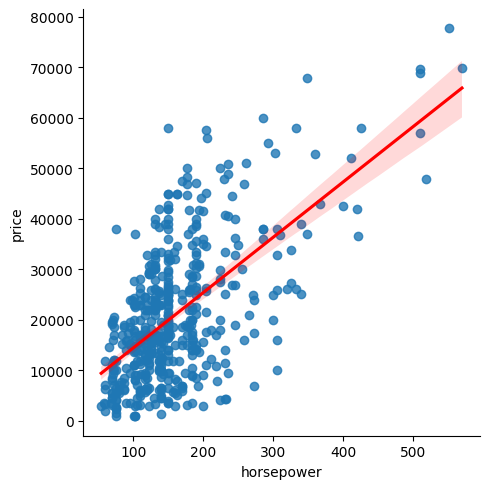

In [6]:
sns.lmplot(x='horsepower', y='price', data=df, line_kws={'color': 'red'})

## 3. Train-Test Split

- We want a model that does not only work on the specific dataset it has trained on, but **generalizes well to new, unseen data**.
- The purpose of the train-test split is to **evaluate the model's performance on unseen data**.
- We train the model on the training set and evaluate it on the test set. 
- If the model performs well on the training data only, but does not generalize to the test data, we call this **overfitting**.
- Typically, we use a **larger training set** (e.g., 80% of the data) **and a smaller test set** (e.g., 20% of the data) so that the model has enough data to learn from, but still enough unseen data to evaluate its performance.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

## 4. Fit linear regression model

- The linear regression model tries to find the **best-fitting line** (or more precisely, hyperplane) through the data.
- For any possible line we can calculate the error between the predicted and the true target values. The "best" line is the one that has the smalles **mean squared error** (MSE).
- The assumption of linear regression is that the relationship between the features and the target variable is linear. This assumption is simple but often works well in practice.
- Note that we **fit the linear regression on the training data**.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. Evaluate the model

- We can use our trained model to **make predictions on the test data**
- Then we can compare these predictions to the true prices of the cars in the test set
- A common metric to evaluate regression models is the **root mean squared error** (RMSE). It gives us an idea of how far off our predictions are on average.
- **In a real-world scenario**, we would try to improve the model by trying different features, algorithms, hyperparameters, and preprocessing steps, and **pick the model that achieves the best performance on the test set**.

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 5971.712195490574


## 6. Predicting the price of a car

Suppose you want to sell your car and you are interested in the price you could ask for it. You can now use the trained model to predict its price:

In [10]:
mycar = pd.DataFrame([{'mileage': 70000,'age': 12,'horsepower': 74,'fuel_consumption': 12}])
mycar

,mileage,age,horsepower,fuel_consumption
0,70000,12,74,12


In [11]:
print(f"The predicted price of a car is {round(model.predict(mycar)[0])}")

The predicted price of a car is 10633


## 7. Model interpretation

- Apart from making predictions, we can also use the trained model to better understand, **how the individual features affect the price**
- While the linear regression model is simple, it has the advantage that we can easily interpret the coefficients of the model.

In [12]:
for coef, name in zip(model.coef_, model.feature_names_in_):
    print(f"A 1 unit increase in {name} is associated with a {coef:.2f} change in price.")

A 1 unit increase in mileage is associated with a -0.04 change in price.
A 1 unit increase in age is associated with a -1191.11 change in price.
A 1 unit increase in horsepower is associated with a 95.76 change in price.
A 1 unit increase in fuel_consumption is associated with a 500.92 change in price.
